In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from IPython.display import SVG
from keras.optimizers import Adam
#from keras.utils.vis_utils import model_to_dot

from sklearn.metrics import mean_squared_error as MSE,mean_absolute_error
from tabulate import tabulate
from sklearn.model_selection import train_test_split

acquiring the data

In [2]:
import pandas as pd
movie_data = pd.read_csv('/content/movies.csv', sep=',', header=None, skiprows=[0])
column_names = ['MovieID', 'Title', 'Genres']
# columns=column_names
movie_data.columns= column_names
movie_data.head()


,MovieID,Title,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
rating_data=pd.read_csv('/content/ratings.csv', sep=',',header=None, engine='python', skiprows=[0])
rating_data.columns=["UserId","MovieId","Rating","Timestamp"]
rating_data.head()

,UserId,MovieId,Rating,Timestamp
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0


Model

In [4]:
len(movie_data)

9742

In [5]:
user_rating_data = rating_data.pivot(index='UserId', columns='MovieId', values='Rating')
user_rating_data.head()

MovieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
UserId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
user_rating_data[user_rating_data.index==215]

MovieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
UserId,,,,,,,,,,,,,,,,,,,,,
215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Normalize the data

In [7]:
norm_user_rating_data = user_rating_data.fillna(0) / 5.0
trX = norm_user_rating_data.values
trX[0:5]

array([[0.8, 0. , 0.8, ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0.8, 0. , 0. , ..., 0. , 0. , 0. ]])

In [8]:
trX[215]

array([0.6, 0. , 0. , ..., 0. , 0. , 0. ])

In [9]:
n_users, n_movies = len(rating_data.UserId.unique()), len(rating_data.MovieId.unique())
f'The dataset includes {len(rating_data)} ratings by {n_users} unique users for {n_movies} unique movies'

'The dataset includes 85271 ratings by 554 unique users for 8757 unique movies'

In [10]:
from sklearn.preprocessing import LabelEncoder
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()

user_ids = user_encoder.fit_transform(rating_data.UserId)
movie_ids = movie_encoder.fit_transform(rating_data.MovieId)

Train Test Split

In [11]:
# train / val split
num_train = int(len(user_ids) * 0.8)
train_user_ids = user_ids[:num_train]
train_movie_ids = movie_ids[:num_train]
train_ratings = rating_data.Rating.values[:num_train]
val_user_ids = user_ids[num_train:]
val_movie_ids = movie_ids[num_train:]
val_ratings = rating_data.Rating.values[num_train:]

In [12]:
num_users= user_ids.max()+1
num_movies = movie_ids.max() + 1

In [13]:
train_ratings /= 5
val_ratings /= 5

In [14]:
train_data = pd.read_csv("/content/train2.csv")

In [15]:
train_data.head()

,userId,movieId,rating
0,1,0,4.0
1,1,1,4.0
2,1,2,4.0
3,1,3,5.0
4,1,4,3.0


In [16]:
cnt_1=0
cnt_2=0
cnt_3=0
cnt_4=0
cnt_5=0
for x in train_data.iterrows():
    if x[1]['rating']==1:
        cnt_1 += 1
    elif x[1]['rating']==2:
        cnt_2 += 1
    elif x[1]['rating']==3:
        cnt_3 += 1
    elif x[1]['rating']==4:
        cnt_4 += 1
    elif x[1]['rating']==5:
        cnt_5 += 1

Distribution of rating data

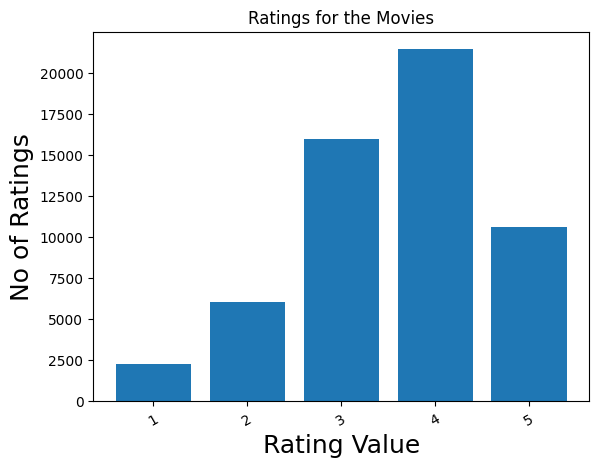

In [17]:
import matplotlib.pyplot as plt
import numpy as np
label = [1,2,3,4,5]
no_ratings = [cnt_1,cnt_2,cnt_3,cnt_4,cnt_5]
index = np.arange(len(label))
plt.bar(index, no_ratings)
plt.xlabel('Rating Value', fontsize=18)
plt.ylabel('No of Ratings', fontsize=18)
plt.xticks(index, label, fontsize=10, rotation=30)
plt.title('Ratings for the Movies')
plt.show()

In [18]:
len(train_data.movieId.unique())

8954

In [19]:
n_users, n_movies = len(train_data.userId.unique()), len(train_data.movieId.unique())
f'The dataset includes {len(train_data)} ratings by {n_users} unique users for {n_movies} unique movies'

'The dataset includes 80669 ratings by 610 unique users for 8954 unique movies'

In [108]:
x_user = preprocessing.scale(train_data['userId'])

In [109]:
train_data['rating'].size

80669

In [112]:
test_data = pd.read_csv("/content/test2.csv")

In [113]:
test_data.head()

,userId,movieId,rating
0,1,0,5.0
1,1,1,5.0
2,1,2,4.0
3,1,3,4.0
4,1,4,4.0


Matrix Factorization of Neural Network

In [20]:
from keras.models import Sequential, Model
from keras.layers import Embedding, Flatten, Dense, Dropout, concatenate, multiply, Input
from keras.optimizers import Adam
#from sklearn.datasets import load_iris
from sklearn import preprocessing

In [21]:
dim_embedding_user = 40
dim_embedding_movie = 40
#book embedding
movie_input = Input(shape=[1],name = 'Movie')
# movie_input = preprocessing.scale(movie_input)
movie_embedding = Embedding(n_movies+1,dim_embedding_movie,name='Movie-Embedding')(movie_input)
movie_vec = Flatten(name='movie_flatten')(movie_embedding)
movie_vec = Dropout(0.2)(movie_vec)
#user embedding
user_input = Input(shape=[1],name='User')
# user_input = preprocessing.scale(user_input)
user_embedding = Embedding(n_users+1,dim_embedding_user,name = 'User-Embedding')(user_input)
user_vec = Flatten(name='user_flatten')(user_embedding)
user_vec = Dropout(0.2)(user_vec)
#concatenate flattened values
concat = concatenate([movie_vec,user_vec])
concat_dropout = Dropout(0.2)(concat)
#dense layer
dense = Dense(20,name='Fully-Connected1',activation='relu')(concat)
result = Dense(1,activation='relu',name='Activation')(dense)
#define model
model = Model([user_input,movie_input],result)
#show model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Movie (InputLayer)          [(None, 1)]                  0         []                            
                                                                                                  
 User (InputLayer)           [(None, 1)]                  0         []                            
                                                                                                  
 Movie-Embedding (Embedding  (None, 1, 40)                358200    ['Movie[0][0]']               
 )                                                                                                
                                                                                                  
 User-Embedding (Embedding)  (None, 1, 40)                24440     ['User[0][0]']            

In [22]:
opt_adam = Adam(lr = 2e-3)

#compile model
model.compile(optimizer= opt_adam, loss= ['mse'], metrics=['mean_absolute_error'])

#fit model
history_tabular = model.fit([train_data['userId'],train_data['movieId']],
                                    train_data['rating'],
                                    batch_size = 256,
                                    validation_split = 0.1,
                                    epochs = 10,
                                    verbose = 1)

Epoch 1/10
284/284 [==============================] - 4s 12ms/step - loss: 3.3781 - mean_absolute_error: 1.3768 - val_loss: 4.4555 - val_mean_absolute_error: 1.8853
Epoch 2/10
284/284 [==============================] - 4s 15ms/step - loss: 0.8021 - mean_absolute_error: 0.6944 - val_loss: 4.3311 - val_mean_absolute_error: 1.8596
Epoch 3/10
284/284 [==============================] - 3s 12ms/step - loss: 0.7544 - mean_absolute_error: 0.6715 - val_loss: 4.0258 - val_mean_absolute_error: 1.7838
Epoch 4/10
284/284 [==============================] - 3s 12ms/step - loss: 0.7317 - mean_absolute_error: 0.6598 - val_loss: 3.6719 - val_mean_absolute_error: 1.6904
Epoch 5/10
284/284 [==============================] - 4s 13ms/step - loss: 0.7146 - mean_absolute_error: 0.6508 - val_loss: 3.1621 - val_mean_absolute_error: 1.5505
Epoch 6/10
284/284 [==============================] - 4s 13ms/step - loss: 0.6977 - mean_absolute_error: 0.6413 - val_loss: 2.6514 - val_mean_absolute_error: 1.3978
Epoch 7/10

In [114]:
model.evaluate(x=[test_data['userId'],test_data['movieId']],y=test_data['rating'],verbose=0)

[1.456300973892212, 0.9436185359954834]

In [111]:
pd.DataFrame(history_tabular.history)

,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,4.118348,1.554717,4.930205,1.998675
1,0.810895,0.698496,4.819439,1.980783
2,0.754576,0.670563,4.685222,1.948982
3,0.731522,0.660303,4.555914,1.919202
4,0.720195,0.653850,4.378519,1.875345
5,0.711497,0.647683,4.143943,1.817111
6,0.708398,0.646116,3.968425,1.774341
7,0.698497,0.641114,3.705779,1.704644
8,0.693800,0.638044,3.467821,1.641627
9,0.686098,0.633803,3.141033,1.549863


neural collaborative filtering

In [115]:
from keras.layers import Input, Dense, Embedding, concatenate, Flatten, Activation, Add, Dropout, Multiply
def get_ncf_model():
    user_inp = Input((1,))
    user_hidden = Embedding(input_dim=num_users, output_dim=64)(user_inp)
    user_hidden = Flatten()(user_hidden)

    item_inp = Input((1,))
    item_hidden = Embedding(input_dim=num_movies, output_dim=64)(item_inp)
    item_hidden = Flatten()(item_hidden)

    # element-wise multiplication
    mf_output = Multiply()([user_hidden, item_hidden])

    hidden = concatenate([user_hidden, item_hidden])
    hidden = Dense(128, activation='relu')(hidden)
    hidden = Dropout(0.2)(hidden)
    mlp_output = Dense(64, activation='relu')(hidden)


    output = concatenate([mf_output, mlp_output])
    output = Dense(1, activation='sigmoid')(output)

    model = Model(inputs=[user_inp, item_inp], outputs=output)
    model.compile(loss='mse', optimizer='adam')
    return model


In [116]:
model = get_ncf_model()
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_7 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding_4 (Embedding)     (None, 1, 64)                39040     ['input_6[0][0]']             
                                                                                                  
 embedding_5 (Embedding)     (None, 1, 64)                622336    ['input_7[0][0]']             
                                                                                            

In [118]:
from keras.callbacks import EarlyStopping
# early stopping wait for 1 epoch
callbacks = [EarlyStopping(patience=1)]

# train for 10 epochs
model.fit([train_user_ids, train_movie_ids], train_ratings,\
          validation_data=([val_user_ids, val_movie_ids], val_ratings), epochs=4, batch_size=128, callbacks=callbacks)

Epoch 1/4
631/631 [==============================] - 7s 12ms/step - loss: 0.0217 - val_loss: 0.0409
Epoch 2/4
631/631 [==============================] - 8s 13ms/step - loss: 0.0195 - val_loss: 0.0462


In [119]:
def dcg_at_k(r, k):
    '''
    Compute DCG
    args:
        r: np.array, to be evaluated
        k: int, number of entries to be considered

    returns:
        dcg: float, computed dcg

    '''
    r = r[:k]
    dcg = np.sum(r / np.log2(np.arange(2, len(r) + 2)))
    return dcg

In [120]:
def ndcg_at_k(r, k, method=0):
    '''
    Compute NDCG
    args:
        r: np.array, to be evaluated
        k: int, number of entries to be considered

    returns:
        dcg: float, computed ndcg

    '''
    dcg_max = dcg_at_k(sorted(r, reverse=True), k)

    return dcg_at_k(r, k) / dcg_max

In [121]:
# compute average ndcg for all users
def evaluate_prediction(predictions):
    '''
    Return the average ndcg for each users
    args:
        predictions: np.array user-item predictions
    returns:
        ndcg: float, computed NDCG
    '''
    ndcgs = []
    for target_user in np.unique(val_user_ids):
        # get movie ids and ratings associated with the target user.
        target_val_movie_ids = val_movie_ids[val_user_ids == target_user]
        target_val_ratings = val_ratings[val_user_ids == target_user]

        # compute ndcg for this user
        ndcg = ndcg_at_k(target_val_ratings[np.argsort(-predictions[val_user_ids == target_user])], k=30)
        ndcgs.append(ndcg)
    ndcg = np.mean(ndcgs)
    return ndcg

In [122]:
# prediction & evalutation
predictions = model.predict([val_user_ids, val_movie_ids])
evaluate_prediction(predictions[:,0])

631/631 [==============================] - 3s 4ms/step


0.8758992961371489